## Importing Libraries

In [31]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv("Online_Retail.csv", encoding='ISO-8859-1')

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [42]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Removing cancelled Invoices

In [43]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [44]:
df = df[df['Quantity'] > 0]

In [45]:
len(df)

531285

In [46]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

### Droping Null Customer ID

In [47]:
df = df.dropna(subset=['CustomerID']).copy()

### Converting Invoive Data to datetime format

In [48]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [50]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Creating Revenue Column

In [51]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [52]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Extracting Year Month

In [53]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [55]:
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'YearMonth']


### Top 5 Customers by Revenue

In [56]:
customer_stats = df.groupby("CustomerID").agg(
    total_revenue = ("Revenue", "sum"),
    invoice_count = ("InvoiceNo", "nunique"),
    avg_invoice_value = ("Revenue", "mean"),
    total_quantity = ("Quantity", "sum"),
    avg_unitprice = ("UnitPrice", "mean")
).sort_values("total_revenue", ascending=False)

top5_customers = customer_stats.head(5)
top5_customers


,total_revenue,invoice_count,avg_invoice_value,total_quantity,avg_unitprice
CustomerID,,,,,
14646.0,280206.02,74,134.714433,197491,2.488505
18102.0,259657.30,60,602.453132,64124,4.503295
17450.0,194550.79,46,577.302047,69993,3.392641
16446.0,168472.50,2,56157.500000,80997,1.660000
14911.0,143825.06,201,25.334694,80515,4.612598


### Sales by Country & Month

In [57]:
country_month = df.groupby(["Country", "YearMonth"]).agg(
    monthly_revenue=("Revenue", "sum"),
    monthly_transactions=("InvoiceNo", "nunique"),
    monthly_quantity=("Quantity", "sum")
).reset_index()

country_month.head(10)


,Country,YearMonth,monthly_revenue,monthly_transactions,monthly_quantity
0,Australia,2010-12,1032.85,3,467
1,Australia,2011-01,9017.71,9,5644
2,Australia,2011-02,14695.42,5,8680
3,Australia,2011-03,17223.99,3,10439
4,Australia,2011-04,771.60,2,225
5,Australia,2011-05,13638.41,4,9079
6,Australia,2011-06,25187.77,4,15981
7,Australia,2011-07,4964.38,7,5318
8,Australia,2011-08,22489.20,2,12570
9,Australia,2011-09,5106.73,8,4079


### Pivot Table: Month × Country → Revenue

In [58]:
pivot_table = df.pivot_table(
    values="Revenue",
    index="YearMonth",
    columns="Country",
    aggfunc="sum",
    fill_value=0
)

pivot_table.head()


Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
YearMonth,,,,,,,,,,,,,,,,,,,,,
2010-12,1032.85,277.20,0.0,1809.91,0.0,0.00,363.53,1590.82,0.00,1281.50,...,0.0,0.00,0.00,1843.73,3834.30,1304.92,0.00,0.00,498661.850,0.0
2011-01,9017.71,0.00,0.0,1200.20,0.0,0.00,675.58,547.50,0.00,0.00,...,0.0,0.00,2053.07,10086.09,3486.32,4231.23,0.00,0.00,442190.060,0.0
2011-02,14695.42,518.36,0.0,2181.07,0.0,0.00,1784.71,4334.24,549.26,399.22,...,0.0,145.92,0.00,2114.50,509.50,2654.92,0.00,889.24,355655.630,0.0
2011-03,17223.99,1708.12,0.0,3351.98,0.0,140.54,3509.33,938.39,0.00,3978.99,...,0.0,0.00,0.00,5363.15,4720.58,1870.23,0.00,0.00,467198.590,0.0
2011-04,771.60,680.78,0.0,1989.48,1143.6,0.00,293.00,0.00,0.00,0.00,...,0.0,0.00,8209.58,1785.65,809.10,2076.94,383.95,0.00,409559.141,299.1


### Descriptive Statistics on Revenue, Quantity, UnitPrice

In [59]:
df[["Revenue", "Quantity", "UnitPrice"]].describe()

,Revenue,Quantity,UnitPrice
count,397924.000000,397924.000000,397924.000000
mean,22.394749,13.021823,3.116174
std,309.055588,180.420210,22.096788
min,0.000000,1.000000,0.000000
25%,4.680000,2.000000,1.250000
50%,11.800000,6.000000,1.950000
75%,19.800000,12.000000,3.750000
max,168469.600000,80995.000000,8142.750000


### Distribution of Average Order Value per Customer

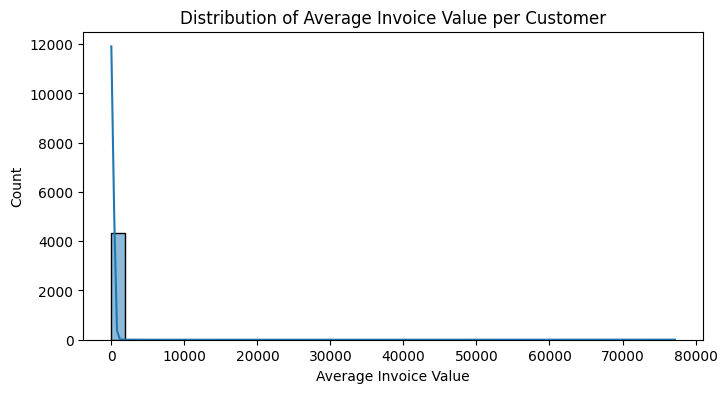

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(customer_stats["avg_invoice_value"], bins=40, kde=True)
plt.title("Distribution of Average Invoice Value per Customer")
plt.xlabel("Average Invoice Value")
plt.ylabel("Count")
plt.show()

Since there are some customers with very high incoices t

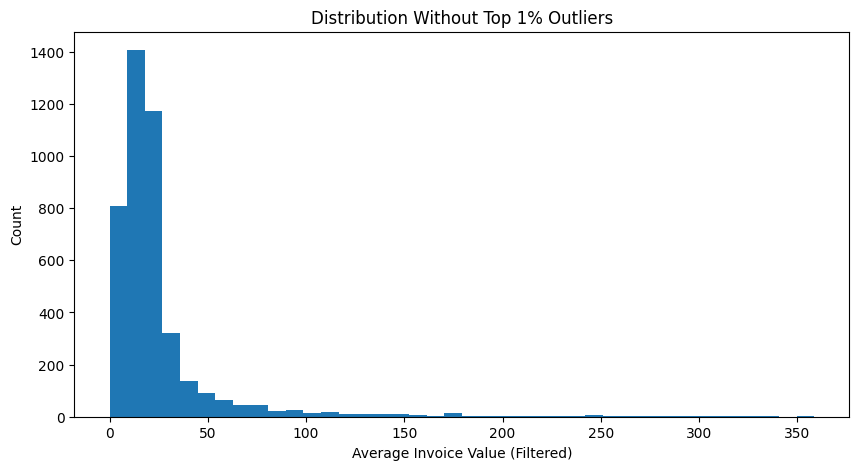

In [70]:


filtered = customer_stats[customer_stats["avg_invoice_value"] < customer_stats["avg_invoice_value"].quantile(0.99)]

plt.figure(figsize=(10,5))
plt.hist(filtered["avg_invoice_value"], bins=40)
plt.xlabel("Average Invoice Value (Filtered)")
plt.ylabel("Count")
plt.title("Distribution Without Top 1% Outliers")
plt.show()




### Top 5 Countries by Revenue

In [63]:
country_stats = df.groupby("Country").agg(
    total_revenue=("Revenue","sum"),
    avg_invoice_revenue=("Revenue","mean"),
    avg_quantity=("Quantity","mean"),
    avg_unit_price=("UnitPrice","mean"),
    transaction_count=("InvoiceNo", "nunique")
).sort_values("total_revenue", ascending=False)

top5_countries = country_stats.head(5)
top5_countries


,total_revenue,avg_invoice_revenue,avg_quantity,avg_unit_price,transaction_count
Country,,,,,
United Kingdom,7308391.554,20.625073,12.048913,2.963793,16649
Netherlands,285446.340,120.798282,85.034702,2.643982,95
EIRE,265545.900,36.687745,19.414894,4.445880,260
Germany,228867.140,25.311562,13.189892,3.708487,457
France,209024.050,25.056827,13.362743,4.415253,389


### Seasonality — Monthly Revenue Trend

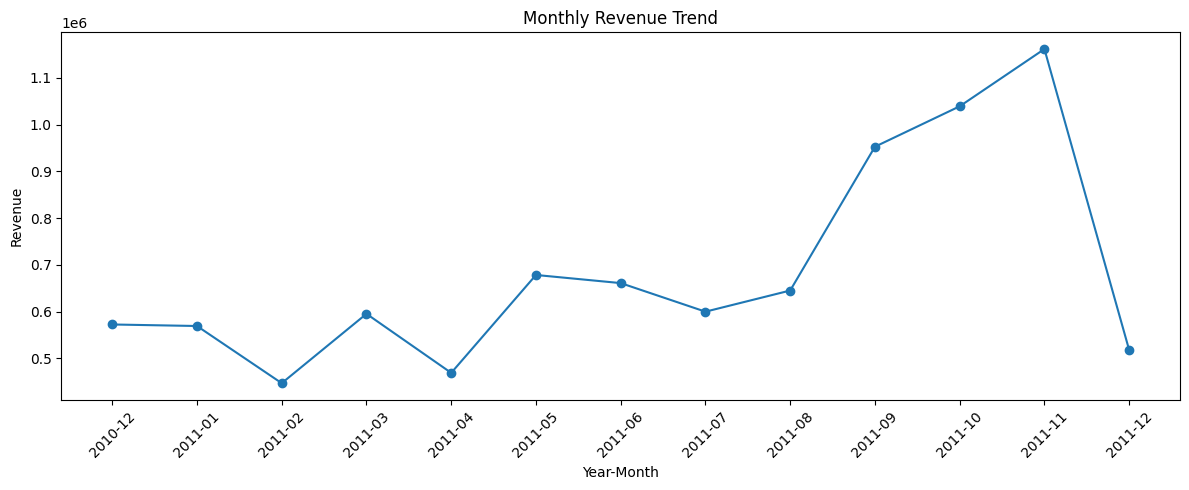

In [64]:
monthly = df.groupby("YearMonth").agg(
    monthly_revenue=("Revenue","sum")
).reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly["YearMonth"], monthly["monthly_revenue"], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


### Correlation: Revenue vs Quantity vs UnitPrice

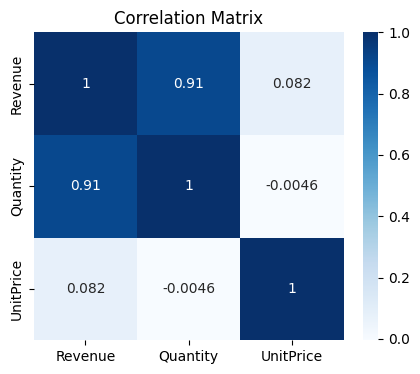

,Revenue,Quantity,UnitPrice
Revenue,1.000000,0.908812,0.081646
Quantity,0.908812,1.000000,-0.004561
UnitPrice,0.081646,-0.004561,1.000000


In [65]:
corr = df[["Revenue", "Quantity", "UnitPrice"]].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

corr


### Top 10 Products by Revenue

In [66]:
product_stats = df.groupby(["StockCode", "Description"]).agg(
    revenue=("Revenue","sum"),
    qty_sold=("Quantity","sum"),
    invoices=("InvoiceNo","nunique")
).sort_values("revenue", ascending=False)

product_stats.head(10)


,,revenue,qty_sold,invoices
StockCode,Description,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995,1
22423,REGENCY CAKESTAND 3 TIER,142592.95,12412,1704
85123A,WHITE HANGING HEART T-LIGHT HOLDER,100448.15,36725,1971
85099B,JUMBO BAG RED RETROSPOT,85220.78,46181,1600
23166,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,77916,195
POST,POSTAGE,77803.96,3120,1099
47566,PARTY BUNTING,68844.33,15295,1380
84879,ASSORTED COLOUR BIRD ORNAMENT,56580.34,35362,1375
M,Manual,53779.93,7179,258
